In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam_clean.csv')
df.shape

(5572, 2)

In [3]:
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
df['message'][20]

'Is that seriously how you spell his name?'

In [11]:
df['type'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: type, dtype: float64

In [16]:
# Libraries for text processing
import re, nltk
# nltk.download('punkt')
# nltk.download('stopwords')
from nltk import word_tokenize
from nltk.corpus import stopwords

In [18]:
# stopwords.words('english')

In [19]:
def clean_tokenized_sentence(s):
    """Performs basic cleaning of a tokenized sentence"""
    cleaned_s = ""  # Create empty string to store processed sentence.
    words = nltk.word_tokenize(s)
    for word in words:
        # Convert to lowercase #
        c_word = word.lower()
        # Remove punctuations #
        c_word = re.sub(r'[^a-z ]+', '', c_word)
        # Remove stopwords #
        if c_word != '' and c_word not in stopwords.words('english'):
            cleaned_s = cleaned_s + " " + c_word    # Append processed words to new list.
    return(cleaned_s.strip())

In [23]:
df['message'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [24]:
clean_tokenized_sentence(df['message'][10])

'gon na home soon nt want talk stuff anymore tonight k cried enough today'

In [27]:
df['cleaned_message'] = df['message'].apply(clean_tokenized_sentence)

In [28]:
df.head()

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [31]:
df['type'] = df['type'].astype('category').cat.codes

In [32]:
df.head()

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [34]:
df.head()

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [35]:
from sklearn.model_selection import train_test_split

In [40]:
df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], 
                                                                df['type'], 
                                                                test_size=0.2, 
                                                                random_state=42)

## BoW/Vectorization

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
vectoriser = CountVectorizer()

In [47]:
vectoriser.fit(df_X_train)

CountVectorizer()

In [48]:
X_train = vectoriser.transform(df_X_train)
X_test = vectoriser.transform(df_X_test)

In [49]:
X_train.shape

(4457, 7041)

In [50]:
X_test.shape

(1115, 7041)

In [55]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
# vectoriser.vocabulary_

In [64]:
X_train[99].toarray().sum()

32

In [65]:
# data is in structured format. 
X_train.shape, y_train.shape

((4457, 7041), (4457,))

# The Algorithm

In [69]:
y_train.value_counts(normalize=True)

0    0.866053
1    0.133947
Name: type, dtype: float64

In [78]:
df_X_train[y_train==1].str.contains('free').mean()

0.2747068676716918

In [79]:
df_X_train[y_train==0].str.contains('free').mean()

0.013989637305699482

In [81]:
len(vectoriser.vocabulary_)

7041

# sklearn

In [82]:
from sklearn.naive_bayes import BernoulliNB

In [83]:
model = BernoulliNB()

In [84]:
model.fit(X_train, y_train)

BernoulliNB()

In [87]:
# not valid - accuracy
model.score(X_train,y_train)

0.9854161992371551

In [92]:
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

In [91]:
y_pred = model.predict(X_test)

In [93]:
f1_score(y_test, y_pred)

0.8856088560885609

In [94]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[964,   1],
       [ 30, 120]])

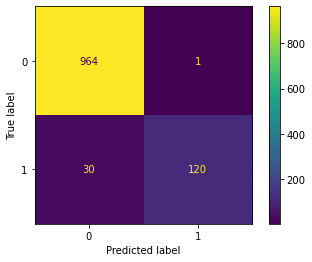

In [96]:
ConfusionMatrixDisplay(cm).plot();